In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
#pip install lazypredict
#import lazypredict
#from lazypredict.Supervised import LazyClassifier
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance

This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

In [2]:
df = pd.read_csv('/Users/alexvalles/Invistico_Airline.csv')
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [4]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


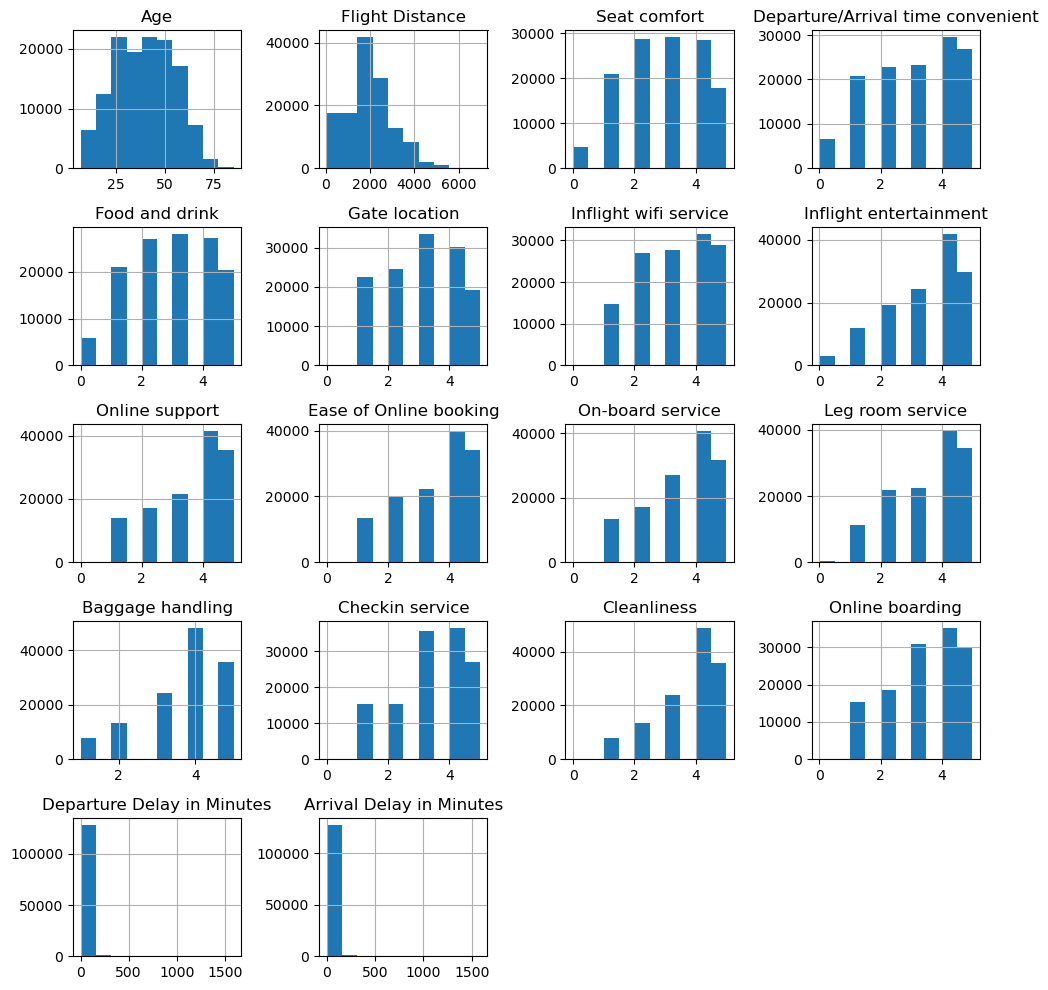

In [6]:
# Visualización de las distribuciones de las variables numéricas
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [7]:
corr = df.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea el mapa de calor
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", annot_kws={'size':10})

# Muestra el gráfico
plt.show()



ValueError: could not convert string to float: 'satisfied'

In [8]:
# Customer satisfaction
df['satisfaction'].value_counts(dropna= False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [9]:
# Satisfaction percentage
satisfaction_percentage= df['satisfaction'].value_counts(normalize= True) * 100
print(satisfaction_percentage)

satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64


In [10]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
df= df.dropna(axis=0).reset_index(drop= True)

In [12]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
df.duplicated().sum()

0

<Axes: xlabel='Age', ylabel='Count'>

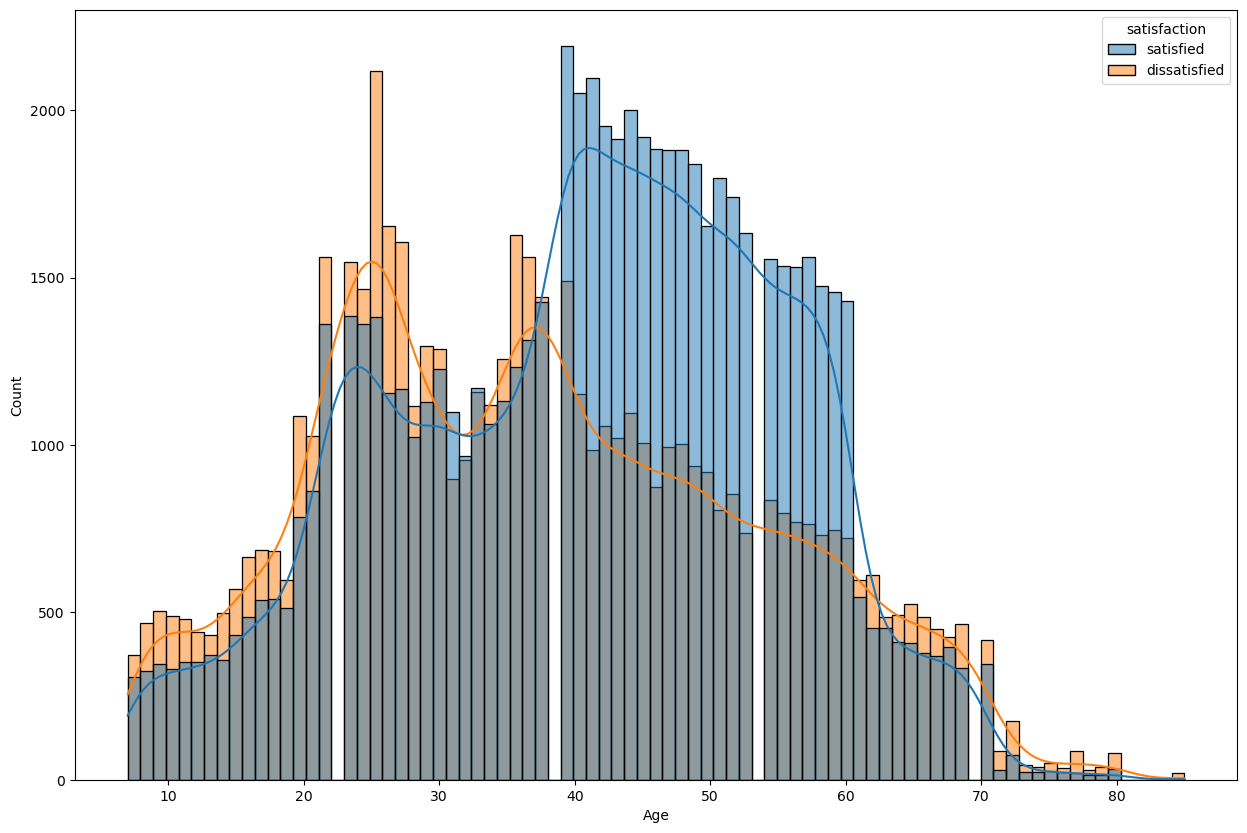

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'Age', hue = 'satisfaction', kde = True, data = df)

<Axes: xlabel='Flight Distance', ylabel='Count'>

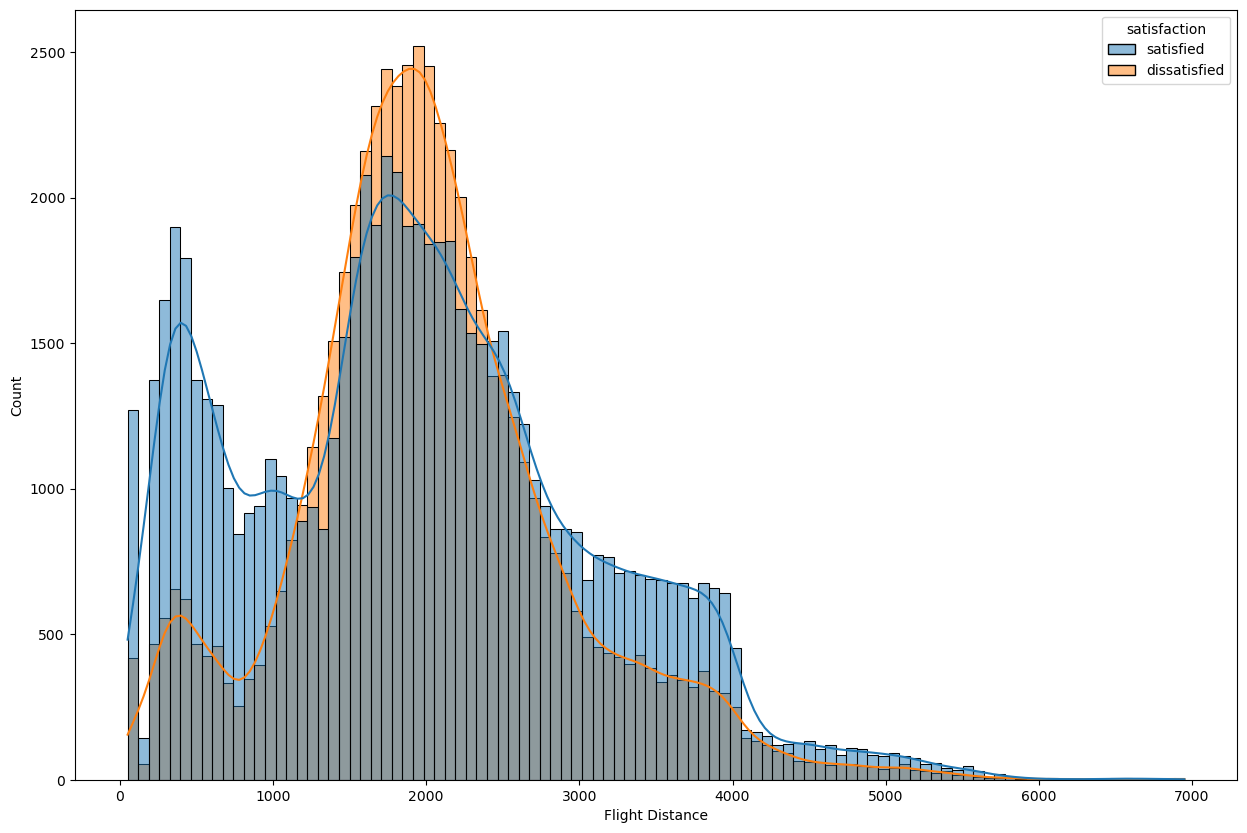

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'Flight Distance', hue = 'satisfaction', kde = True, bins = 100, data = df)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

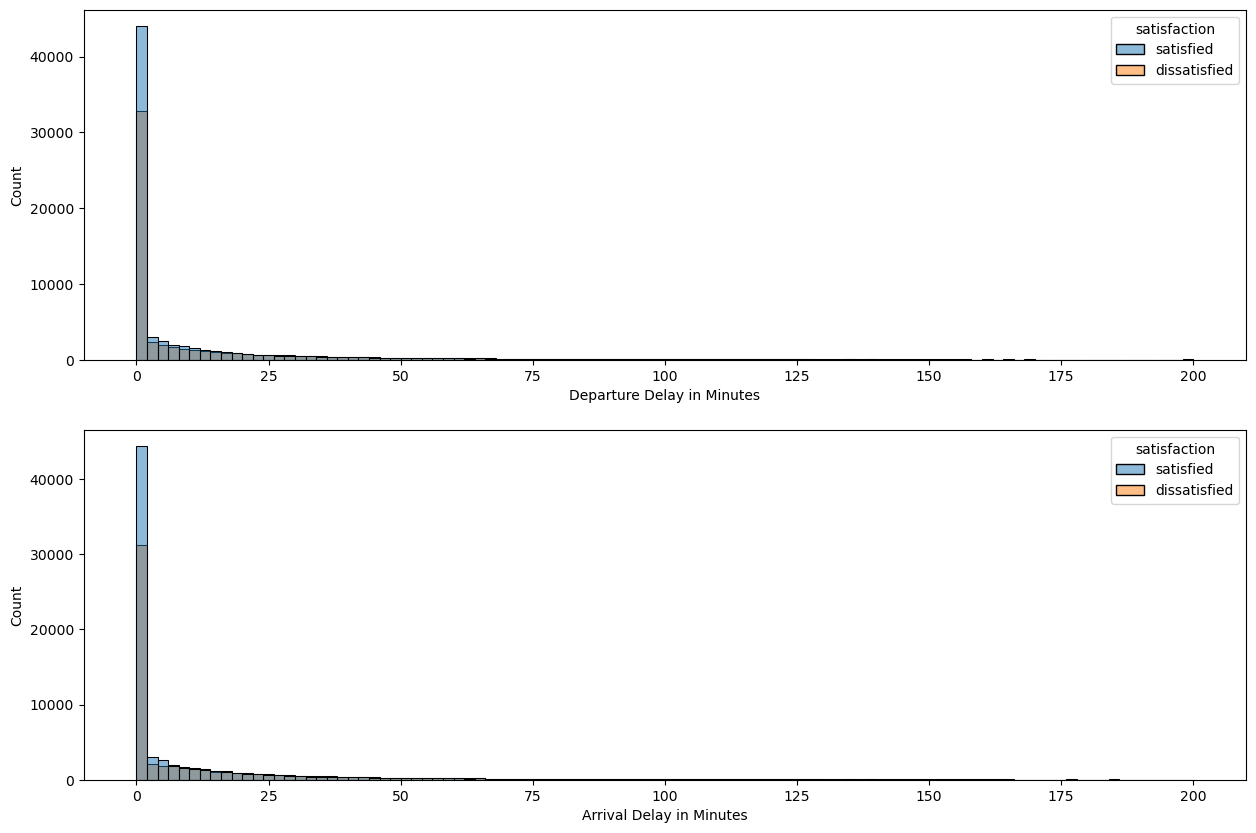

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.histplot(x = 'Departure Delay in Minutes', hue = 'satisfaction', data = df, binwidth = 2, binrange = [0,200])

plt.subplot(2, 1, 2)
sns.histplot(x = 'Arrival Delay in Minutes', hue = 'satisfaction', data = df, binwidth = 2, binrange = [0,200])

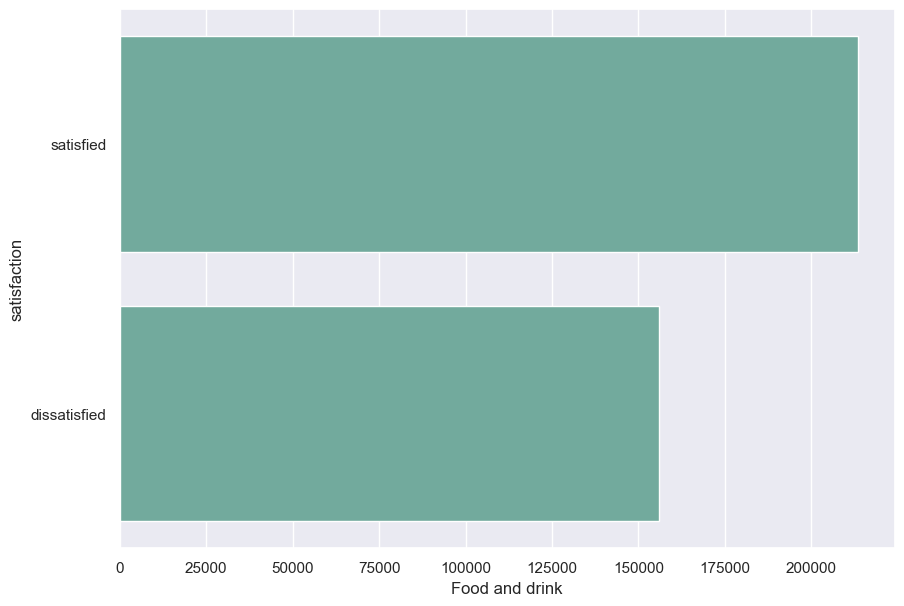

In [17]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Food and drink", 
    y="satisfaction", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [18]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [19]:
df.groupby('Food and drink').count()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Food and drink,,,,,,,,,,,,,,,,,,,,,
0,5922,5922,5922,5922,5922,5922,5922,5922,5922,5922,...,5922,5922,5922,5922,5922,5922,5922,5922,5922,5922
1,21008,21008,21008,21008,21008,21008,21008,21008,21008,21008,...,21008,21008,21008,21008,21008,21008,21008,21008,21008,21008
2,27078,27078,27078,27078,27078,27078,27078,27078,27078,27078,...,27078,27078,27078,27078,27078,27078,27078,27078,27078,27078
3,28065,28065,28065,28065,28065,28065,28065,28065,28065,28065,...,28065,28065,28065,28065,28065,28065,28065,28065,28065,28065
4,27129,27129,27129,27129,27129,27129,27129,27129,27129,27129,...,27129,27129,27129,27129,27129,27129,27129,27129,27129,27129
5,20285,20285,20285,20285,20285,20285,20285,20285,20285,20285,...,20285,20285,20285,20285,20285,20285,20285,20285,20285,20285


In [20]:
# food and drinks

unique_values_fd = df['Food and drink'].nunique()
unique_values_fd


6

In [21]:
value_counts_fd = df['Food and drink'].value_counts()
value_counts_fd


Food and drink
3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: count, dtype: int64

In [22]:
value_counts_class = df['Class'].value_counts()
value_counts_class

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

In [23]:
value_counts_traveltype = df['Type of Travel'].value_counts()
value_counts_traveltype

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

In [24]:
value_counts_customer = df['Customer Type'].value_counts()
value_counts_customer

Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64

In [25]:
df['Age']=df['Age'].replace((np.arange(7,13)),'Children')
df['Age']=df['Age'].replace((np.arange(13,21)),'Teenager')
df['Age']=df['Age'].replace((np.arange(20,51)),'Adult')
df['Age']=df['Age'].replace((np.arange(50,91)),'Senior')

In [26]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,Adult,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,Teenager,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [27]:
value_counts_age = df['Age'].value_counts()
value_counts_age

Age
Adult       81975
Senior      33499
Teenager     9242
Children     4771
Name: count, dtype: int64

In [28]:
df = df.rename(columns = {'Age':'Age Group'})
df.head()

,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,Adult,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,Teenager,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [29]:
grouped = df.groupby(['Age Group', 'Class'])

# To see the size of each group
print(grouped.size())

Age Group  Class   
Adult      Business    42856
           Eco         33631
           Eco Plus     5488
Children   Business      660
           Eco          3568
           Eco Plus      543
Senior     Business    16522
           Eco         14471
           Eco Plus     2506
Teenager   Business     1952
           Eco          6447
           Eco Plus      843
dtype: int64


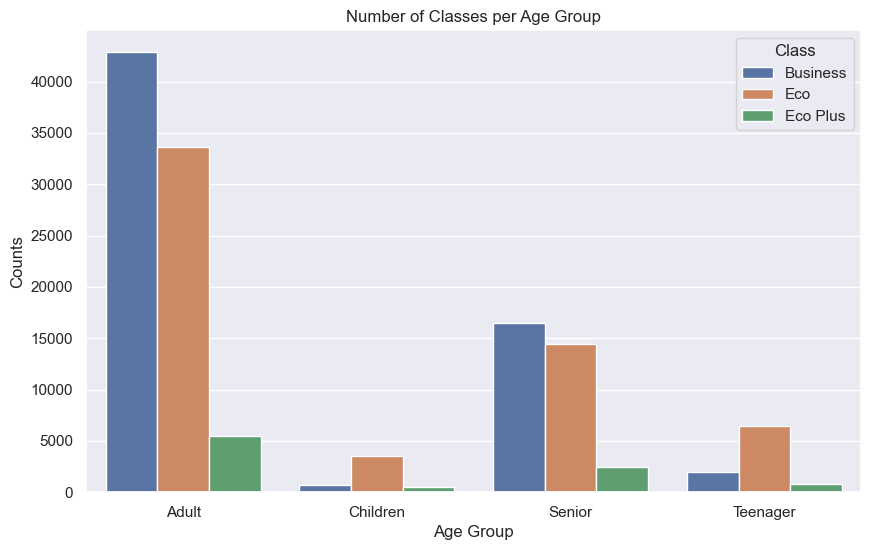

In [30]:

grouped_counts = grouped.size().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Counts', hue='Class', data=grouped_counts)
plt.title('Number of Classes per Age Group')
plt.show()


In [31]:
grouped_age_gender = df.groupby(['Age Group','Gender'])['Gender'].count()
grouped_age_gender

Age Group  Gender
Adult      Female    41738
           Male      40237
Children   Female     2403
           Male       2368
Senior     Female    16834
           Male      16665
Teenager   Female     4728
           Male       4514
Name: Gender, dtype: int64

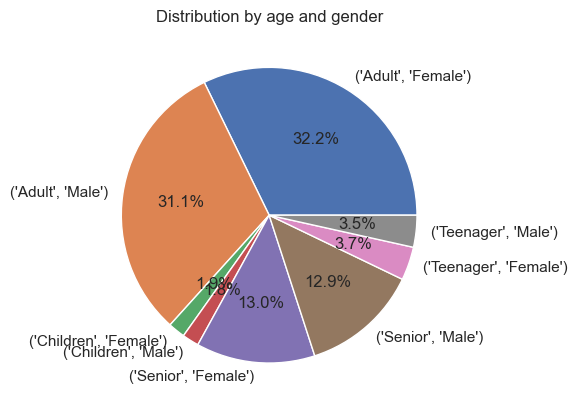

In [32]:

fig, ax = plt.subplots()
ax.pie(grouped_age_gender, labels = grouped_age_gender.index, autopct='%1.1f%%')
ax.set_title('Distribution by age and gender')
plt.show()

In [34]:
satisfaction_age_gender = df.groupby(['Age Group','Gender', 'satisfaction'])['satisfaction'].count()
satisfaction_age_gender

Age Group  Gender  satisfaction
Adult      Female  dissatisfied    15926
                   satisfied       25812
           Male    dissatisfied    21313
                   satisfied       18924
Children   Female  dissatisfied      711
                   satisfied        1692
           Male    dissatisfied     2042
                   satisfied         326
Senior     Female  dissatisfied     4510
                   satisfied       12324
           Male    dissatisfied     8886
                   satisfied        7779
Teenager   Female  dissatisfied     1757
                   satisfied        2971
           Male    dissatisfied     3460
                   satisfied        1054
Name: satisfaction, dtype: int64

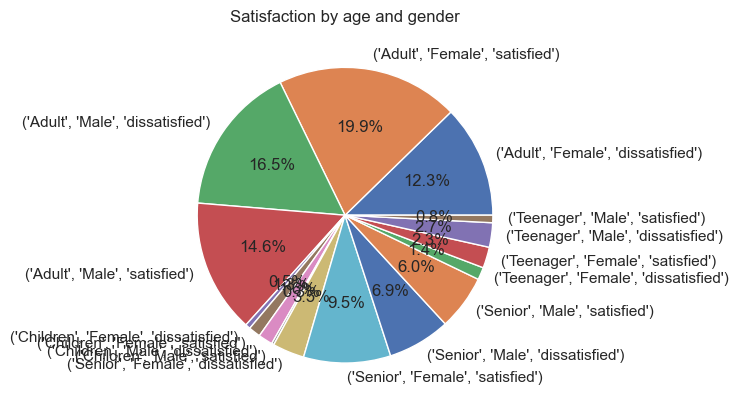

In [38]:
fig, ax = plt.subplots()
ax.pie(satisfaction_age_gender, labels = satisfaction_age_gender.index, autopct='%1.1f%%')
ax.set_title('Satisfaction by age and gender')
plt.show()

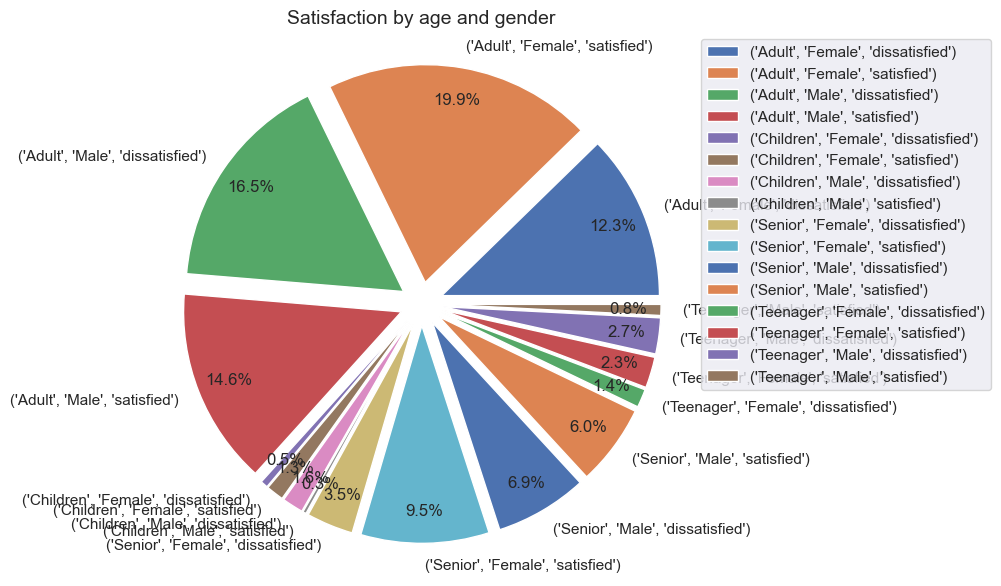

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size
explode = (0.1,) * len(satisfaction_age_gender)  # Explode all slices
ax.pie(satisfaction_age_gender, labels=satisfaction_age_gender.index, autopct='%1.1f%%', explode=explode, pctdistance=0.85)
ax.set_title('Satisfaction by age and gender', fontsize=14)
plt.legend(satisfaction_age_gender.index, loc="upper left", bbox_to_anchor=(1,1))  # Adjust the position of the legend
plt.tight_layout()
plt.show()



In [41]:
df

,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,Adult,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,Teenager,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,Adult,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [43]:


pd.set_option('display.max_columns', None)  # None means unlimited
df


,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,Adult,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,Teenager,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,Senior,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,Adult,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,Male,disloyal Customer,Senior,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


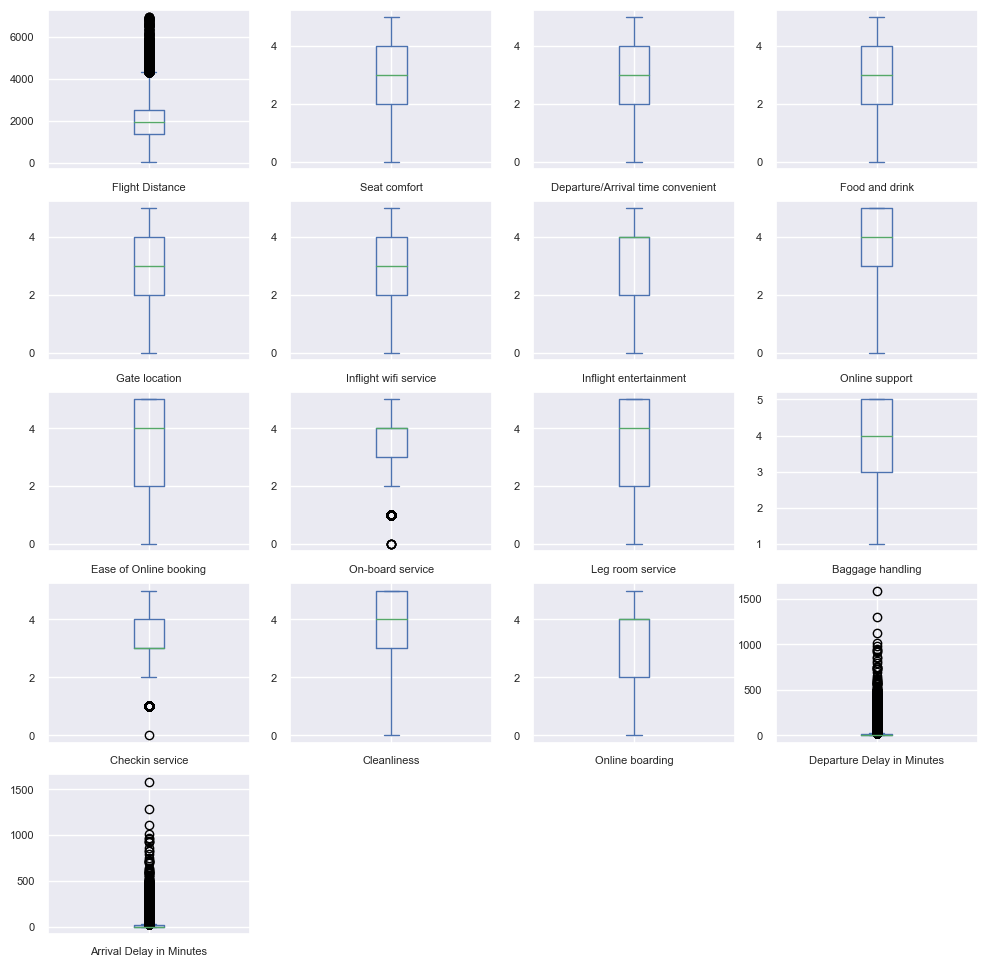

In [45]:
df.plot(kind='box',subplots=True, layout=(5,4), fontsize=8, figsize=(12,12));

In [58]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age Group',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [59]:
# SHAPIRO TEST


from scipy.stats import shapiro

columns = ['Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

 #Realizamos el test de Shapiro-Wilk para cada columna
for column in columns:
    stat, p = shapiro(df[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: Flight Distance, Estadística: 0.979, p-valor: 0.000
Columna: Seat comfort, Estadística: 0.929, p-valor: 0.000
Columna: Departure/Arrival time convenient, Estadística: 0.911, p-valor: 0.000
Columna: Food and drink, Estadística: 0.926, p-valor: 0.000
Columna: Gate location, Estadística: 0.905, p-valor: 0.000
Columna: Inflight wifi service, Estadística: 0.899, p-valor: 0.000
Columna: Inflight entertainment, Estadística: 0.892, p-valor: 0.000
Columna: Online support, Estadística: 0.868, p-valor: 0.000
Columna: Ease of Online booking, Estadística: 0.877, p-valor: 0.000
Columna: On-board service, Estadística: 0.883, p-valor: 0.000
Columna: Leg room service, Estadística: 0.882, p-valor: 0.000
Columna: Baggage handling, Estadística: 0.863, p-valor: 0.000
Columna: Checkin service, Estadística: 0.893, p-valor: 0.000
Columna: Cleanliness, Estadística: 0.863, p-valor: 0.000
Columna: Online boarding, Estadística: 0.894, p-valor: 0.000
Columna: Departure Delay in Minutes, Estadística: 0.421

In [62]:
from sklearn.preprocessing import LabelEncoder

# assuming data is your DataFrame and 'column1', 'column2', etc. are the columns you want to encode
le = LabelEncoder()

df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])

LET'S PREDICT THE SATISFACTION GRADE

In [63]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = robust_scaler.fit_transform(X_train)

# Solo transformar los datos de prueba (no volver a ajustar para evitar data leakage)
X_test_scaled = robust_scaler.transform(X_test)

In [65]:
# clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [66]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11821
           1       0.97      0.95      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [68]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Define the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}